# Appendix: A primer on random variables and probabilities

<div class="alert alert-block alert-warning">
    <b>Prerequisites</b>
    
- Not much

</div>

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>
    
- Intuition on random variable
- **Non** learning outcome: correct mathematical framework

</div>

In this notebook, we review important concepts about random variables. All measurements contain some form of uncertainty that can be attributed either to the measurement device or to random fluctuation of the field we are trying to measure. In order to formalize this uncertainty, we are going to use random variables and probability. Let us derive a couple of key results that we are going to use throughout this class.

We propose two different approach in order to grasp most the framework: a heuristic approach with illustrations and lightweight math and more rigourous approach. You may want to look at one or the other (or idealy both) depending on your sensibility.

We will use an example with a continuous variable (not only because I am tired of rolling dice but also because most of our application use continuous random variables)


## Heuristic definitions

### Random variable

A *random variable* is not really a variable: it is a function whose outcome is uncertain. Here, we use random variables as a mathematical framework to reproduce uncertainty. One specific outcome of that random variable is called a realization.

> For instance, the *Temperature* $T$ is a random variable. And on January 1st 2021 I read on my thermomether $t=273$ K: that was a realization of that random variable.
> - ***Question***: give a couple of other random variables and realizations

We usually write random variables with capital letters ($T$) and a realization with low case letter ($t$)

### Sample space

The *sample space* contains all possible outcomes of a random variable and is denoted with the letter $\Omega$

> If we continue with the idea that the temperature $T$ (expressed in Kelvin) is a random variable, $T$ can be any positive real number so the sample space is $\mathbb R^+$
> - ***Question***: What is the sample space of the random variables you picked?

### Event space

> We now consider a particular experiment like "Measure the temperature in Paris in January". You have to admit that it is very unlikely that you are ever going to measure a temperature of $T>500$ K.  Or if I reformulate: the probability that you measure a temperature $T>500$ K is very small. The statement: "$T>500$ K" is called an event that we can call $A$. For this experiment, there are as many event as you can think of: here is another one $200K<T<300$ K.
> - ***Question***: Provide more events.
>
> Note that "$T=200$ K" is not an event: we'll get back to it in a minute.

As illustrated above, an event $A$ is any subset of the entire sample space $\Omega$. All possible events are gathered in an *event space* denoted with the letter $\mathcal A$. Note that if an event $A$ is a subset of $\Omega$, it is sometimes easier to think of an event as "$x \in A$" instead of just $A$. These are just two different ways to write the same thing.

### Probability

You can assign a probability $P$ to each event $A$, where probability is a number between 0 and 1. If the probability $P(A)$ is close to 1, it means that the event $A$ will likely occur and probability $P(A)$ close to 0 means that the event $A$ will certnainly not occur. 

> ***Question***: Estimate the probability of the events you chose in the context of a specific experiment (like measure the temperature somewhere at a given time of the year).

### The probability space

The *probability space* is the ensemble of three elements: the sample space, the event space and the probability: $(\Omega, \mathcal A, P)$

### Cumulative density function

As we just saw, for each temperature $t$ there is a probability that the random variable $T$ takes values smaller than $t$: it is $P(T \le t)$. Since we are going to use these kind of events ("$T \le t$") a lot, we are coming up with a specific name for the probaility of all these events: we call it the *cumulative distribution function (cdf)* and write it

\begin{equation}
F_T(t) = P(T \le t)\, ,
\end{equation}
and it really does what it says: as $t$ tends to 0, the probability of observing a temperature below that threshold is also very close to zero whereas the probability of observing a temperature  below a very big value of $t$ is close to 1. The name cumulative comes from the fact that we are always trying to find temperature below a threshold. We plot the typical shape of a cdf for our random variable in the figure below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

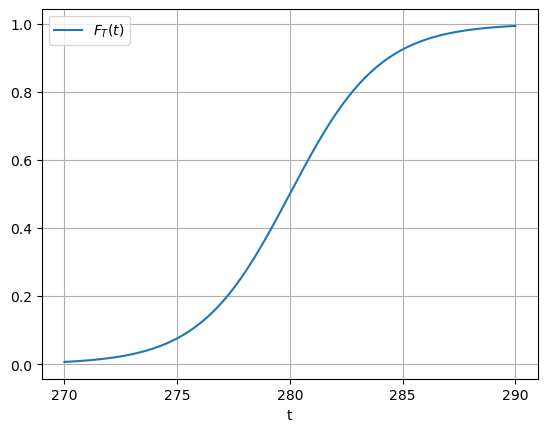

In [2]:
def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10,10,200)
plt.plot(x+280,sigmoid(0.5*x), label=r'$F_T(t)$')
plt.xlabel('t')
plt.xticks(range(270,291,5))
plt.legend()
plt.grid()

> ***Question***
> - In the figure, can you estimate visually $F_T(280)$, $F_T(275)$, $F_T(290)$ and recall what it means?

We call the median temperature $t_m$ such that $F_T(t_m) = 0.5$

> ***Question***
> - What is the median temperature in the figure above? Can you rephrase the definition of the median?

The way the cdf grows between 0 and 1 depends on the specific experiment we are considering and so it depends on the underlying probability to observe such or such event.
> ***Question***
> - The cdf is never decreasing. Can you see why? 

Let's show it

### Introduction to probability density function

The cdf was designed to visualize the events "$T\le t$". But what about other events like "$T > t$". These are relatively easy to visualize because

\begin{equation}
P(T > t) = 1 - P(T\le t)
\end{equation}
We have this result because the two events are mutually exclusive (you can only observe one or the other) and their union covers all possible obervations of temperature. In fact if two events $A$ and $B$ are mutually exclusive, then their union is the sum of their probabilities:

\begin{equation}
P(A\cup B) = P(A) + P(B)\, ,
\end{equation}
where $A\cup B$ means "observe either $A$ or $B$"

> ***Question***
> - With this formula, can you show that
>\begin{equation}
P(t_1 < T \le t_2) = P(T \le t_2) - P(T \le t_1)\, ,
\end{equation}
> 
> *Be careful because $A\cup B$ is probably not what do you think it is in this case: check the signs...*
> - You now have the proof that the cdf never decreases. Do you see why?

### Is "$T=300$ K" an event?

...well not really: it is impossible to measure $T = 300.000000(etc)$ with as many zeros as you wish (to get an infinite precision), so the probability of that "event" is zero! (It is like asking: "what if the probability of rolling a die and get 3.5")

you can see it as

\begin{align}
&\lim_{\Delta t \rightarrow 0}P(t < T \le t+\Delta t)\\
=& \lim_{\Delta t \rightarrow 0}P(t \le T) - P(t+\Delta t \le T)\\
=& P(t \le T) - P(t \le T)\\
=& 0\, ,
\end{align}
where we used the fact that probability is continuous to stick the $\lim$ inside the probability.

### Probability density function

Ok so we know that "$T=t$" is not an event but we still would like to have a feel for the probability to measure a temperature close to $t$. We can do that with 

\begin{equation}
P(t -0.5\Delta t)< T \le P(t+0.5\Delta t)
\end{equation}

and adjust $\Delta t$ to the precision we wish to achieve. So, we have

\begin{equation}
P(t -0.5\Delta t< T \le t + 0.5\Delta t) = F_T(t+0.5\Delta t) - F_T(t-0.5\Delta t) 
\end{equation}

In order to not have the same issue as above as $\Delta t$ tends to zero, we need to divide that expression by $\Delta t$ and we end up with a probability per "precision interval". As $\Delta t$ tends to zero, we recover the familiar expression of the derivative in the right hand side.

\begin{equation}
\frac{P(t -0.5\Delta t< T \le t + 0.5\Delta t)}{\Delta t} = \frac{F_T(t+0.5\Delta t) - F_T(t-0.5\Delta t)}{\Delta t}
\end{equation}

We call the left hand side the "probability per precision interval". In the limit $\Delta t \rightarrow 0$, this converges to the *probability density function (pdf)* which is formally

\begin{equation}
f(t) = \frac{d}{dt}F_T(t) 
\end{equation}

and of course, we recover
\begin{equation}
P(t < T \le t + \Delta t) = \int_t^{t+\Delta t} f(t) dt = F_T(t+\Delta t) - F_T(t)
\end{equation}

So the probabilities of these events "$t_0 < T \le t_1 $" will be given by the integral of the pdf between $t_0$ and $t_1$ which is relatively easy to visualize. A naive yet correct way to estimate the pdf from a data set is to plot the binned histogram of that data set. We plot below the classical shape of the pdf for the gaussian distribution that we are going to review after.

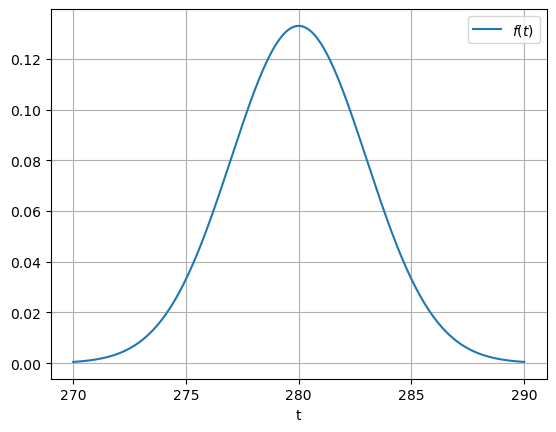

In [3]:
# this is not the integral of the sigmoid. Just here for illustration
def gaussian(x, mu, sigma):
  return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-((x - mu)/sigma)**2/2)

x = np.linspace(-10,10,200)
plt.plot(x+280,gaussian(x,0,3), label=r'$f(t)$')
plt.xlabel('t')
plt.xticks(range(270,291,5))
plt.legend()
plt.grid()

> ***Questions***
> - Based on the properties of $F_T(t)$ that you already know, can you show that  
>     - $f(t) \ge 0$ for all $t$
>     - $\int_\Omega f(t) dt = 1$
> - Is it possible that $f(t)>1$ for some value of $t$?

## Percentile of a distribution

The median correspond to the point $t_m$ such that half the area under the density curve is to the left of $t_m$ and half is to the right of $t_m$ (remember that $F_T(t_m) = 0.5$). The 25th percentile is called the lower 
quartile and the 75th percentile is called the upper quartile. We can use boxplot to quickly visualize the main properties of a distribution as illustrated in the figure below.

<img alt="Boxplot" width=400, src="images/Boxplot_vs_PDF.svg.png">
From Wikipedia

## Mean

The mean $\mu$ of a random variable is defined as

\begin{equation}
\mu = \int_\Omega t f(t) dt
\end{equation}

and correspond to the sum all possible values of $t$ weighted by their probability of occurence.

## Expected value

Because we use this type of integral a lot (weighted average), we define the *expected value* $E(\cdot)$:

\begin{equation}
E (g(t)) = \int_\Omega g(t)f(t) dt
\end{equation}

and so we have $\mu = E(t)$

Remember that expectation is linear operator.

> ***Question***
> - Can you show that $E(aX + b) = a E(X) + b$ 

## Variance

The variance $\sigma^2$ measures the spread of the random variable and is the expected value of the square of the distance to the mean:

\begin{equation}
\sigma^2 = E[(t-\mu)^2]
\end{equation}

It is sometimes noted as $V(t) = \sigma^2$

> ***Question***
> - Show that $\sigma^2 = E[t^2] - [E(t)]^2$
> - If $T$ is a random variable with variance $\sigma^2$. Show that $V(aT+b) = a^2 \sigma^2$.
>
> You may need to define a new random variable $X = aT+b$

## The normal distribution


The *normal distribution* is probably the most well known distribution. It corresponds to the bell-shape curve that we plotted above. It is a very good approximation for the distribution of many process in nature. The exact expression for the normal distribution of mean $\mu$ and variance $\sigma^2$ is

\begin{equation}
f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}
\end{equation}

and where the renormalization pre-factor is needed to ensure that the integral over $\mathbb R$ is 1.

Normal distribution is often write as 

\begin{equation}
\mathcal {N}(\mu ,\sigma^2)
\end{equation}

If the random variable $T$ follows a normal distribution: $T\sim\mathcal {N}(\mu ,\sigma^2)$, we have

\begin{equation}
P(\mu -2\sigma) < T \le P(\mu + 2\sigma) \simeq 0.95
\end{equation}

which means that 95% of the realizations of $T$ are in the interval $[\mu -2\sigma, \mu + 2\sigma]$ (look again at the plot in the section ["Percentile of a distribution"](#Percentile-of-a-distribution)). This will be very useful when we will try to compute confidence intervals.

If $X$ and $Y$ are two independent normal random variables, with means $\mu_X$ and $\mu_Y$ and variance  $\sigma_X^2$ and  $\sigma_Y^2$, then their sum $X + Y$ will also be normally distributed with mean  $\mu_X + \mu_Y$ and variance $\sigma_X^2+\sigma_Y^{2}$ ([Proof](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables)).

### The standard normal distribution

The *standard normal distribution* is  $\mathcal {N}(\mu = 0, \sigma^2 = 1$)

> ***Question***
> - If $T\sim\mathcal {N}(\mu ,\sigma^2)$ and $X\sim\mathcal {N}(0 ,1)$. Can you express $T$ as a function of $X$?

## Example: Regional surface temperature in France

In [4]:
# Import modules
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set data directory
data_dir = Path('data')

# Set keyword arguments for pd.read_csv
kwargs_read_csv = dict(header=0, index_col=0, parse_dates=True)

# Set first and last years
FIRST_YEAR = 2014
LAST_YEAR = 2021

# Define file path
filename = 'surface_temperature_merra2_{}-{}.csv'.format(
    FIRST_YEAR, LAST_YEAR)
filepath = Path(data_dir, filename)

# Read hourly temperature data averaged over each region
df_temp = pd.read_csv(filepath, **kwargs_read_csv).resample('D').mean()
temp_lim = [-5, 30]
label_temp = 'Temperature (°C)'

In [5]:
def plot_temp(region_name=df_temp.columns[0], year=FIRST_YEAR):
    df = df_temp[[region_name]].loc[str(year)]
    df.columns = [label_temp]
    nt = df.shape[0]
    std = float(df.std(0).iloc[0])
    mean = pd.Series(df[label_temp].mean(), index=df.index)
    df_std = pd.DataFrame(
        {'low': mean - std, 'high': mean + std}, index=df.index)
    cdf = pd.DataFrame(index=df.sort_values(by=label_temp).values[:, 0],
                       data=(np.arange(nt)[:, None] + 1) / nt)
    cdf.index.name = label_temp
    cdf.columns = ['Probability']

    fig, axes = plt.subplots(nrows=1, ncols=3)
    fig.set_figwidth(15)

    # time series
    pts = df.plot(ax=axes[0], ylim=temp_lim)
    pts.hlines(df[label_temp].mean(), xmin=df.index[0], xmax=df.index[-1], linestyles='dashed')
    pts.fill_between(df_std.index.values, df_std.low, df_std.high, alpha=.2)
    pts.title.set_text('Time series, Mean, ± 1 STD')

    # cdf plot
    pcdf = cdf.plot(ax=axes[1], xlim=temp_lim, ylim=[0, 1])
    pcdf.vlines(df[label_temp].mean(), ymin=0, ymax=1, linestyles='dashed')
    pcdf.title.set_text('Cumulative Distrib. Func.')

    # pdf plot
    pkde = df.plot.kde(xlim=temp_lim, ax=axes[2])
    ylim3 = pkde.get_ylim()
    pkde.vlines(df[label_temp].mean(), ymin=0, ymax=ylim3[1], linestyles='dashed')
    pkde.set_ylim([0, ylim3[1]])
    pkde.title.set_text('Probability Distrib. Func.')

In [6]:
# Show
from ipywidgets import interact
interact(plot_temp,region_name=df_temp.columns, year=range(FIRST_YEAR, LAST_YEAR))

interactive(children=(Dropdown(description='region_name', options=('Grand Est', 'Nouvelle-Aquitaine', 'Auvergn…

<function __main__.plot_temp(region_name='Grand Est', year=2014)>

## Collection of random variable

> Suppose now that we want to measure temperature *and* wind magnitude at the same time. Wind magnitude $U$ is a random variable just like temperature. However, it has a completely different *probability space*: different sample space, different event space and different probabilities. Yet we can still ask ourselves "What is the probability of observing a Temperature lower than 280K and a wind magnitude less than 10 m/s". This is measured by the joint probability $P(T \le 280K, U \le 10m/s)$


We can define a joint cumulative distribution function that takes now two variables as an input:

\begin{equation}
F_{T,U}(t,u)=P (T\leq t,U\leq u)
\end{equation}

and of course we can generalize this to as many variables as we want.

As before, we define $f(t,u)$, the joint pdf of temperature and velocity as:

\begin{equation}
f(t,u)=\frac{\partial}{\partial u} \frac{\partial}{\partial t } F_{T,U}(t,u)
\end{equation}

We can also express the cumulative density function as the integral of a multivariate pdf

\begin{equation}
F_{T,U}(t,u)=\int_{-\infty}^t \int_{-\infty}^u f(t',u') dt'du'\, .
\end{equation}

The joint pdf corresponds to the probability (density) of observing at the same time $T=t$ and $U=u$. It is a function of 2 variables and can be represented with contour lines in the $(t,u)$ plane.

If we integrate $f(t,u)$ over all possible events in $U$, we recover the pdf of temperature, also called the marginal density

\begin{equation}
f(t)=\int_{\Omega_u} f(t,u) du
\end{equation}


We also express the total pdf as the product of the conditional pdf of observing $T=t$ given $U=u$ times the marginal pdf of $U$

\begin{equation}
f(t, u) =  f(t | u) f(u)
\end{equation}

## Is $f(t|u)$ a function of $t$ or $u$ or both?

A priori $f(t|u)$ is a function of both. However, we often use is either with fixed $u$ or fixed $t$.

- fixed $u$: it is a conditional pdf
- fixed $t$: it is a likelihood


### Bayes' Theorem

In the expression above, we can interchange the role of $t$ and $u$

\begin{equation}
f(t, u) =  f(u|t) f(t)
\end{equation}

If we equate these two equation and reorganize the terms we get

\begin{equation}
f(u|t) f(u) = f(t|u) f(t)
\end{equation}

More on Bayes' Theorem when we will do classification.

### Independent variables

If $T$ and $U$ are independent then $F_{T, U}(t, u) = F_T(t)F_U(u)$.

> This would require that the wind and the temperature are completely independent from each other

## Sample vs Population

In machine learning problems, we only have access to a small amount of data compared to all possible data data we could have. We call this small data set a *sample* data and the maximum set of data the *population* data. This terminology refers to the idea of conducting a poll to predict the outcome of an election: you cannot ask every single voter which candidate he is going to pick. So you select a representative *sample* and conduct your poll. If you do your job well, you can then infer the result of the election for the entire *population* 

Let $(x_i, y_i), i = 1, \ldots, N$ be a sample drawn from the joint distribution of the random variables $X$ and $Y$.
Then we have the following unbiased estimates:

- Sample mean: $\bar{x} = \sum_{i = 1}^N x_i$
- Sample variance: $s_X^2 = \frac{1}{N - 1} \sum_{i = 1}^N \left(x_i - \bar{x}\right)^2$
- Sample covariance: $q_{X,Y} = \frac{1}{N - 1} \sum_{i = 1}^N \left(x_i - \bar{x}\right) \left(y_i - \bar{y}\right)$

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>